In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow_federated as tff

C:\Users\Hp\anaconda3\envs\Project2\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.2 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf


In [3]:
img = image.load_img("dataset/train/covid/COVID-100.png")

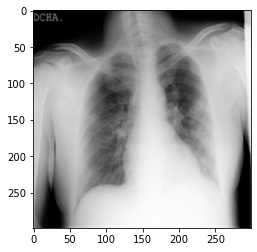

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("Dataset1/training/covid/COVID-1.png")

In [6]:
cv2.imread("dataset/train/covid/COVID-1.png").shape

(299, 299, 3)

In [7]:
train = ImageDataGenerator(rescale=1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

In [8]:
train_dataset = train.flow_from_directory('dataset/train/',
                                         target_size = (150,150),
                                         batch_size = 32,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset = train.flow_from_directory('dataset/test/',
                                         target_size = (150,150),
                                         batch_size = 32,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset = train.flow_from_directory('dataset/validation/',
                                         target_size = (150,150),
                                         batch_size = 32,
                                         color_mode='grayscale',
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [9]:
validation_dataset.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2, 'tuberculosis': 3}

In [10]:
validation_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])
model.save('initial_model.model')

INFO:tensorflow:Assets written to: initial_model.model\assets


In [12]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [13]:
from keras.callbacks import CSVLogger

history=model.fit(train_dataset,
 steps_per_epoch =100,
 validation_data = validation_dataset,
 validation_steps = len(validation_dataset),
 epochs= 50,
 callbacks=[early_stop]
 )

Epoch 1/50
100/100 [==============================] - 203s 2s/step - loss: 1.8204 - acc: 0.2950 - val_loss: 1.2765 - val_acc: 0.4613
Epoch 2/50
100/100 [==============================] - 200s 2s/step - loss: 1.2207 - acc: 0.5175 - val_loss: 0.9346 - val_acc: 0.6050
Epoch 3/50
100/100 [==============================] - 199s 2s/step - loss: 0.9748 - acc: 0.6097 - val_loss: 0.7803 - val_acc: 0.6869
Epoch 4/50
100/100 [==============================] - 203s 2s/step - loss: 0.9156 - acc: 0.6194 - val_loss: 0.7175 - val_acc: 0.6687
Epoch 5/50
100/100 [==============================] - 200s 2s/step - loss: 0.8091 - acc: 0.6550 - val_loss: 0.6341 - val_acc: 0.7631
Epoch 6/50
100/100 [==============================] - 199s 2s/step - loss: 0.6979 - acc: 0.7150 - val_loss: 0.8122 - val_acc: 0.6931
Epoch 7/50
100/100 [==============================] - 200s 2s/step - loss: 0.6787 - acc: 0.7081 - val_loss: 0.5884 - val_acc: 0.7588
Epoch 8/50
100/100 [==============================] - 200s 2s/step - 

In [15]:
model.evaluate(test_dataset)

25/25 [==============================] - 12s 483ms/step - loss: 0.8632 - acc: 0.9187


[0.8631792664527893, 0.918749988079071]

In [16]:
predictions = model.predict(x=test_dataset, verbose=0)

In [17]:
for i in predictions:
    print(i)

[9.9999774e-01 6.7912703e-18 0.0000000e+00 2.2626277e-06]
[9.8697287e-01 1.2901956e-02 9.9408071e-06 1.1528497e-04]
[1.00000000e+00 7.27997662e-09 1.05322965e-14 9.39032116e-11]
[9.9976593e-01 2.3398049e-04 1.0298709e-10 1.4758841e-07]
[9.9997199e-01 9.2775833e-18 1.7027924e-18 2.7969276e-05]
[9.9730957e-01 1.3053316e-03 6.1421707e-07 1.3845486e-03]
[9.9999881e-01 5.9634277e-07 3.2440776e-11 5.9162647e-07]
[1.0000000e+00 2.7723778e-14 4.6669071e-23 1.0338591e-15]
[7.4258220e-01 2.5133848e-01 7.5903831e-06 6.0716583e-03]
[9.9998105e-01 1.6077809e-05 7.5432417e-13 2.8874044e-06]
[9.9999666e-01 3.3671022e-06 2.7828820e-16 6.5671213e-10]
[9.99999762e-01 1.29669475e-08 2.08062978e-13 2.80212078e-07]
[9.9999964e-01 1.4795879e-07 3.3802074e-15 1.7228479e-07]
[0.85195553 0.13804424 0.0037395  0.0062608 ]
[9.999988e-01 1.126588e-06 4.343631e-15 1.361341e-08]
[9.9999630e-01 3.6520580e-06 2.0112753e-22 1.4856309e-08]
[9.9968135e-01 3.1474116e-04 2.5802888e-10 3.9739834e-06]
[9.9945027e-01 5.48891

[2.0226829e-17 3.0817768e-17 2.2411699e-25 1.0000000e+00]
[5.1771431e-06 6.6730990e-03 2.9122443e-26 9.9332172e-01]
[4.1621833e-13 4.4842837e-17 1.3744775e-29 1.0000000e+00]
[1.8768027e-05 1.5361085e-05 2.8389474e-17 9.9996591e-01]
[7.9728292e-13 1.7501749e-14 3.3830223e-29 1.0000000e+00]
[7.9309415e-12 2.7627588e-11 4.7263380e-29 1.0000000e+00]
[2.2585392e-07 3.0660977e-10 5.2231720e-18 9.9999976e-01]
[7.7151032e-20 3.7578373e-25 0.0000000e+00 1.0000000e+00]
[1.6411601e-11 2.9431902e-12 1.4568909e-30 1.0000000e+00]
[3.5493970e-09 9.2516947e-01 3.7243672e-34 7.4830495e-02]
[9.3002711e-13 8.5999437e-07 2.0114422e-37 9.9999917e-01]
[2.4955308e-22 4.9654717e-23 0.0000000e+00 1.0000000e+00]
[2.6628061e-07 1.8560384e-07 1.8782580e-21 9.9999952e-01]
[6.2173891e-11 3.3072978e-05 6.4108755e-29 9.9996698e-01]
[4.9765834e-12 1.1510885e-13 5.2190495e-26 1.0000000e+00]
[2.5742315e-11 2.9293126e-08 5.7311426e-29 1.0000000e+00]
[3.7543607e-05 2.4910876e-06 2.1562576e-06 9.9995780e-01]
[1.0155495e-08

In [18]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [19]:
rounded_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       3, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1, 3, 3, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(y_true=test_dataset.classes, y_pred=rounded_predictions)

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[152  40   0   8]
 [  6 192   0   2]
 [  0   6 193   1]
 [  3   5   0 192]]


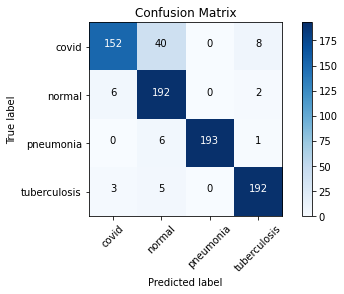

In [23]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [25]:
labels = ['covid', 'normal','tuberculosis', 'pneumonia']
report_VGG = classification_report(test_dataset.classes, rounded_predictions, target_names=labels)
print(report_VGG)

              precision    recall  f1-score   support

       covid       0.94      0.76      0.84       200
      normal       0.79      0.96      0.87       200
tuberculosis       1.00      0.96      0.98       200
   pneumonia       0.95      0.96      0.95       200

    accuracy                           0.91       800
   macro avg       0.92      0.91      0.91       800
weighted avg       0.92      0.91      0.91       800



In [28]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    plt.show()

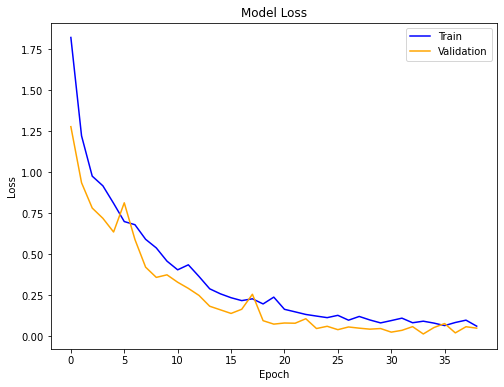

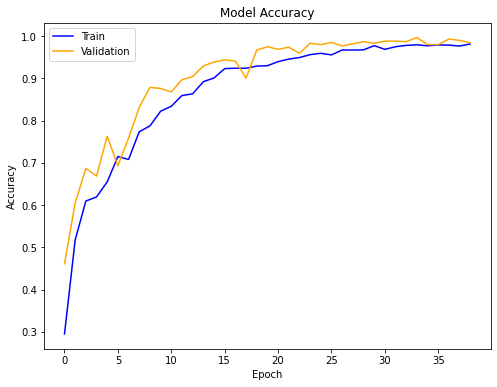

In [29]:
plot_loss_acc(history)